In [1]:
# I/O
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=1

# Dataset
import numpy as np
import netCDF4 as nc

# Plot
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Time
import time

# Video
from IPython.display import Video

In [2]:
def filename_constructor(time_index, case, var):
    return str(f"/data/cloud2023/vvmData{case}/archive{var}-{str(time_index).zfill(6)}.nc")

casenames = ["/rce_walker_15k_05m_p3",
             "/rce_walker_15k_1m_p3",
             "/rce_walker_1k_1m_p3",
             "/rce_walker_1k_2m_p3"]
varnames = ["/exp.C.LandSurface",
            "/exp.C.Surface",
            "/exp.L.Dynamic",
            "/exp.L.Radiation",
            "/exp.L.Thermodynamic"]
os.getcwd()

'/data/cloud2023/r12229008/HW5'

0.21196255 5.081398
YEET_1
0.24254057 7.5517807
YEET_2
0.45651913 6.778751
YEET_3
0.88114077 8.6596985
YEET_4
0.66940606 7.8426104
YEET_5
0.9368211 7.9823656
YEET_6
0.8303961 7.631416
YEET_7
1.0964146 10.214578
YEET_8
1.3439353 7.3720226
YEET_9
0.8489877 6.167908
YEET_10
0.29039016 8.510792
YEET_11
0.24605489 3.865316
YEET_12
0.22657074 7.618144
YEET_13
0.20815122 3.709971
YEET_14
0.24413761 8.14345
YEET_15
0.38773048 8.084915
YEET_16
0.5446209 8.585168
YEET_17
0.773553 7.479608
YEET_18
0.8032662 9.554789
YEET_19
1.0364064 8.444671
YEET_20
0.9469521 8.149415
YEET_21
0.9642792 5.9937186
YEET_22
0.70204955 5.9474854
YEET_23
0.3104124 5.183216
YEET_24
0.30743584 5.532248
YEET_25
0.21713795 5.447993
YEET_26
0.24358277 5.9921145
YEET_27
0.9954017 7.717363
YEET_28
0.70282143 7.114933
YEET_29
0.7936686 7.809134
YEET_30
1.1724495 8.466272
YEET_31
1.1081145 6.9343505
YEET_32
1.0726182 7.0098796
YEET_33
1.1575831 10.181549
YEET_34
0.20426507 0.3264504
YEET_35
0.19584422 0.6944384
YEET_36
0.19986

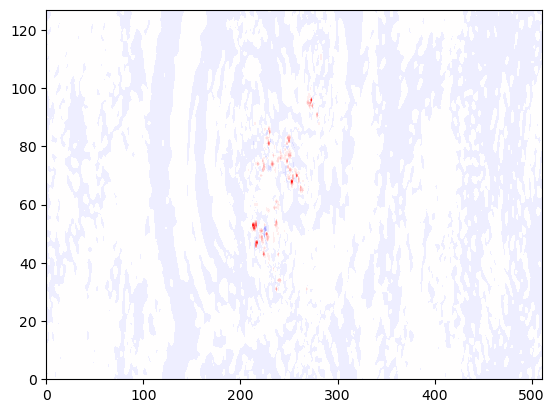

In [53]:
comp = np.zeros((30,49))
n_image = 0
# Step 1.
# Determine convection center by updraft/downdraft
for time in range(1000,1050):
    dataset = nc.Dataset(filename_constructor(str(time).zfill(6), casenames[1], varnames[2]))
    w = np.mean(dataset["w"][-1,:-15,:,:], axis = 1)
    w_test = dataset["w"][-1,12,:,:]
    plt.contourf(w_test, levels = 32, cmap = 'bwr')
    # interpolate 3km data
    convective_centre = np.argmax((w[12,:]+w[13,:])/2)
    # Check centre is valid
    if (convective_centre<=24 or convective_centre>=488):
        
        pass
    else:
        
        print(np.max(w), np.max(w_test))
        # Step 2.
        # Calculate associated variable
        u = np.mean(dataset["u"][-1,:-15,:,convective_centre-24:convective_centre+24+1], axis = 1)
        dataset = nc.Dataset(filename_constructor(str(time).zfill(6), casenames[1], varnames[-1]))
        th = np.mean(dataset["th"][-1,:-15,:,convective_centre-24:convective_centre+24+1], axis = 1)
        qv = np.mean(dataset["qv"][-1,:-15,:,convective_centre-24:convective_centre+24+1], axis = 1)
        qc = np.mean(dataset["qc"][-1,:-15,:,convective_centre-24:convective_centre+24+1], axis = 1)
        qi = np.mean(dataset["qi"][-1,:-15,:,convective_centre-24:convective_centre+24+1], axis = 1)
        thv = th*(1 + 0.608*qv)
        comp += qi
        n_image += 1
        print(f"YEET_{n_image}")
comp /= n_image
n_image = 1

# plt.contourf(comp, levels = 32, cmap = 'bwr')
# plt.show()

# # Step 1.
# # Determine convection center by updraft/downdraft
# time = 1000
# dataset = nc.Dataset(filename_constructor(str(time).zfill(6), casenames[-1], varnames[2]))
# w = np.mean(dataset["w"][-1,:-15,:,:], axis = 1)
# # interpolate 3km data
# convective_centre = np.argmax((w[12,:]+w[13,:])/2)
# # Check centre is valid
# if (convective_centre<=24 or convective_centre>=488):
#     convective_centre = None
# else:
#     pass
# print(convective_centre)
# # Step 2.
# # Calculate associated variable
# u = np.mean(dataset["u"][-1,:-15,:,convective_centre-24:convective_centre+24+1], axis = 1)
# dataset = nc.Dataset(filename_constructor(str(time).zfill(6), casenames[-2], varnames[-1]))
# th = np.mean(dataset["th"][-1,:-15,:,convective_centre-24:convective_centre+24+1], axis = 1)
# qv = np.mean(dataset["qv"][-1,:-15,:,convective_centre-24:convective_centre+24+1], axis = 1)
# qc = np.mean(dataset["qc"][-1,:-15,:,convective_centre-24:convective_centre+24+1], axis = 1)
# qi = np.mean(dataset["qi"][-1,:-15,:,convective_centre-24:convective_centre+24+1], axis = 1)
# print(th.shape)
# thv = th*(1 + 0.608*qv)
# print(thv.shape)
# xc = dataset["xc"][convective_centre-24:convective_centre+24+1]
# zc = dataset["zc"][:-15]
# plt.contourf(xc, zc, thv - np.mean(thv, axis = 1).reshape(-1,1), levels = 32, cmap = 'bwr')
# plt.show()

In [4]:
# class GIFs:
#     def __init__(self, case_idx):
#         self.fig = plt.figure(figsize=(16, 9), dpi = 160)
#         self.axes_3 = [self.fig.add_axes([0.10, 0.05, 0.32, 0.40]),
#                        self.fig.add_axes([0.43, 0.05, 0.02, 0.40])]
#         self.axes_4 = [self.fig.add_axes([0.54, 0.05, 0.32, 0.40]),
#                        self.fig.add_axes([0.87, 0.05, 0.02, 0.40])]
#         self.axes_1 = [self.fig.add_axes([0.10, 0.50, 0.32, 0.40]),
#                        self.fig.add_axes([0.43, 0.50, 0.02, 0.40])]
#         self.axes_2 = [self.fig.add_axes([0.54, 0.50, 0.32, 0.40]),
#                        self.fig.add_axes([0.87, 0.50, 0.02, 0.40])]
#         self.axes_2[0].sharex(self.axes_1[0])
#         self.axes_3[0].sharex(self.axes_1[0])
#         self.axes_4[0].sharex(self.axes_1[0])
#         self.axes_2[0].sharey(self.axes_1[0])
#         self.axes_3[0].sharey(self.axes_1[0])
#         self.axes_4[0].sharey(self.axes_1[0])
#         # self.ax1 = self.fig.add_axes([0.1,0.330,
#         #                               0.800,0.550])
#         # self.ax2 = self.fig.add_axes([0.1,0.080,
#         #                               0.800,0.250])
#         self.ID = case_idx
        
#     def run(self):
        
#         def init():
#             dataset = nc.Dataset(filename_constructor(str(0).zfill(6), casenames[self.ID], varnames[-1]))
#             self.xx, self.zz = np.meshgrid(dataset.variables["xc"][:]/1e3, dataset.variables["zc"][:11]/1e3)
#             th = np.mean(dataset.variables["th"][-1, :11, :, :], axis = 1)
#             qv = np.mean(dataset.variables["qv"][-1, :11, :, :], axis = 1)
#             ql = np.mean(dataset.variables["qc"][-1, :11, :, :], axis = 1) + np.mean(dataset.variables["qr"][-1, :11, :, :], axis = 1)
#             thv = th * (1 + 0.608 * qv - ql)
            
          
#             # Fig.1
#             self.plot1 = self.axes_1[0].contourf(self.xx, self.zz, thv - np.mean(thv, axis = 1).reshape(-1,1),
#                                                  levels = np.linspace(-1,1,21),
#                                                  extend = "both",
#                                                  cmap = "bwr")
#             plt.colorbar(self.plot1, cax = self.axes_1[1])
#             self.axes_1[0].set_title(r"$\theta_v-\bar{\theta}_v(z)$")
#             self.axes_1[0].set_xticks(np.linspace(0,1024,5), ["0", "256", "512", "768", "1024"])
#             self.axes_1[0].set_xlim(0,1024)
#             self.axes_1[0].set_yticks(np.linspace(0,2,5), ["0", "0.5", "1", "1.5", "2"])
#             self.axes_1[0].set_ylim(0,2)
#             # Fig.2
#             self.plot2 = self.axes_2[0].contourf(self.xx, self.zz, th - np.mean(th, axis = 1).reshape(-1,1),
#                                                  levels = np.linspace(-1,1,21),
#                                                  extend = "both",
#                                                  cmap = "bwr")
#             plt.colorbar(self.plot2, cax = self.axes_2[1])
#             self.axes_2[0].set_title(r"$\theta-\bar{\theta}(z)$")
#             # Fig.3
#             self.plot3 = self.axes_3[0].contourf(self.xx, self.zz, qv,
#                                                  levels = np.linspace(0.012,0.020,21),
#                                                  extend = "both",
#                                                  cmap = "Reds")
#             plt.colorbar(self.plot3, cax = self.axes_3[1])
#             self.axes_3[0].set_title(r"$q_v$")
#             # Fig.4
#             self.plot4 = self.axes_4[0].contourf(self.xx, self.zz, ql,
#                                                  levels = 51,
#                                                  extend = "both",
#                                                  cmap = "Reds")
#             self.axes_4[0].set_title(r"$q_l$")
#             plt.colorbar(self.plot4, cax = self.axes_4[1])
#             return 0
#         def update(time):
#             try:
#                 self.plot1.remove()
#                 self.plot2.remove()
#                 self.plot3.remove()
#                 self.plot4.remove()
#             except:
#                 pass
#             dataset = nc.Dataset(filename_constructor(str(time).zfill(6), casenames[self.ID], varnames[-1]))
#             th = np.mean(dataset.variables["th"][-1, :11, :, :], axis = 1)
#             qv = np.mean(dataset.variables["qv"][-1, :11, :, :], axis = 1)
#             ql = np.mean(dataset.variables["qc"][-1, :11, :, :], axis = 1) + np.mean(dataset.variables["qr"][-1, :11, :, :], axis = 1)
#             thv = th * (1 + 0.608 * qv - ql)
            
            
#             self.plot1 = self.axes_1[0].contourf(self.xx, self.zz, thv - np.mean(thv, axis = 1).reshape(-1,1),
#                                                  levels = np.linspace(-1,1,21),
#                                                  extend = "both",
#                                                  cmap = "bwr")
#             self.plot2 = self.axes_2[0].contourf(self.xx, self.zz, th - np.mean(th, axis = 1).reshape(-1,1),
#                                                  levels = np.linspace(-1,1,21),
#                                                  extend = "both",
#                                                  cmap = "bwr")
#             self.plot3 = self.axes_3[0].contourf(self.xx, self.zz, qv,
#                                                  levels = np.linspace(0.012,0.020,21),
#                                                  extend = "both",
#                                                  cmap = "Reds")
#             self.plot4 = self.axes_4[0].contourf(self.xx, self.zz, ql,
#                                                  levels = 51,
#                                                  extend = "both",
#                                                  cmap = "Reds")
#             self.fig.suptitle(f'Iterations : {time}')
#             return 0
#         # self.anim = animation.FuncAnimation(fig = self.fig, 
#         #                                     func = update,
#         #                                     frames = 1200, 
#         #                                     init_func = init, 
#         #                                     interval = 30,
#         #                                     blit = False)
#         # self.anim.save("test.mp4")
#         return None

In [5]:
# test = GIFs(1)
# test.run()


In [6]:
# Video("test.mp4")